# Linear Discriminant Analysis - Demonstration
## With dimensionality reduction

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from LinearDiscriminantAnalysis import LinearDiscriminantAnalysis

In [2]:
# Configuration:
np.set_printoptions(precision=4, suppress=True)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Dataset:
mnist = fetch_openml('mnist_784', version=1, data_home='.', as_frame=True)
mnist.frame['target'] = mnist.target

In [4]:
# Function for displaying part of the dataset:
def print_mnist(X, y=None, title=None):
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    
    n_samples = X.shape[0]
    images = X.reshape(-1, 28, 28)
    for i in range(min(n_samples, 12 * 12)):
        ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
        ax.imshow(images[i], cmap=plt.cm.binary, interpolation='nearest')
        if y is not None:
            ax.text(0, 7, str(y[i]))
    
    fig.suptitle(title, y=1.08, fontsize=22)

In [5]:
X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

X.shape, y.shape

((70000, 784), (70000,))

In [6]:
# Number of dimensions to preserve:

n_dimensions = 5

## PCA Transformation
This is the pairplot of the first 8 dimensions of the MNIST dataset from Sci-Kit Learn after applying PCA.

In [7]:
pca = PCA(random_state=42, n_components=n_dimensions)
X_pca = pca.fit_transform(X)

X_pca.shape

(70000, 5)

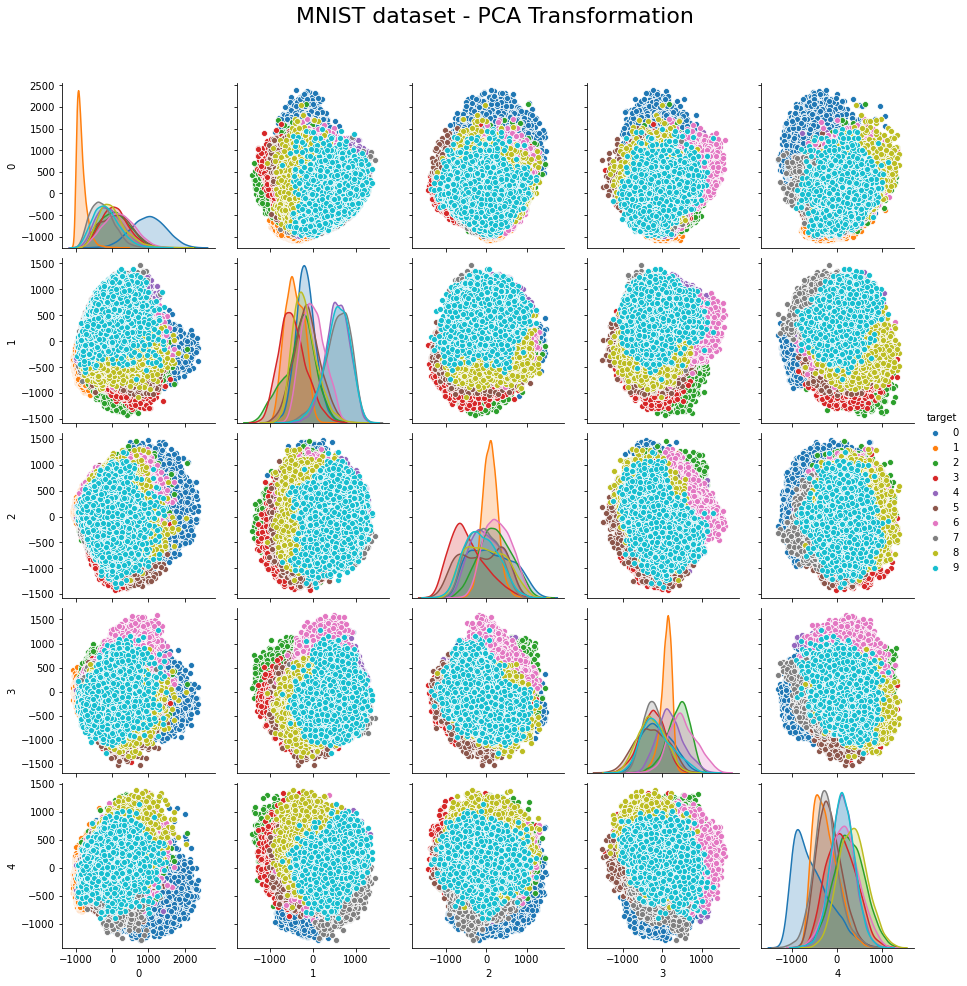

In [8]:
mnist_pca = pd.DataFrame.from_records(X_pca[:, :8])
mnist_pca['target'] = y
g = sns.pairplot(mnist_pca, hue="target")
g.fig.suptitle(f"MNIST dataset - PCA Transformation", y=1.08, fontsize=22);

In [9]:
X_pca_inv = pca.inverse_transform(X_pca)

X_pca_inv.shape

(70000, 784)

## LDA Transformation (without intra-class clustering)
This is the pairplot of the first 8 dimensions of the MNIST dataset from Sci-Kit Learn after applying LDA.

In [10]:
lda = LinearDiscriminantAnalysis(random_state=42, n_components=n_dimensions)
X_lda = lda.fit_transform(X, y, class_clustering=False, verbose=True)

X_lda.shape

Targets were provided: using the labeled data.

Mu:
[[  0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.0018   0.0067   0.0031   0.0001
    0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.
    0.0002   0.0013   0.0113   0.0231   0.0432   0.0622   0.1179   0.1712
    0.1934   0.1901   0.2063   0.1827   0.1701   0.1445   0.0992   0.0682
    0.0489   0.0183   0.0086   0.003    0.       0.       0.       0.
    0.       0.       0.0009   0.0006   0.006    0.0109   0.0563   0.1394
    0.2682   0.521    0.9166   1.4125   2.0055   2.6448   3.2949   3.6582
    3.6887   3.3026   2.7046   1.9718   1.1747   0.608    0.2864   0.0918
    0.0303   0.0074   0.       0.       0.       0.       0.0028   0.005
    0.0132   0.0703   0.2188   0.5492   1.1733   2.2705   3.782    5.6468
    7.6889   9.9488  11.987   13.2303  12.9729  11.5404   9.3011   6.6749
   

Mu_c[1]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.0396   0.0645   0.009    0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.0109   0.0507   0.1085   0.2062   0.2912   0.3518
   0.2078   0.0611   0.0229   0.0321   0.0076   0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.0053   0.0013
   0.       0.       0.       0.0037   0.0042   0.05     0.0966   0.2143
   0.4739   1.2345   1.7018   1.7856   1.446    1.2817   1.0042   0.742
   0.3958   0.2239   0.1108   0.0185   0.       0.       0.       0.
   0.     

Mu_c[5]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.0093   0.0784
   0.1281   0.1624   0.2078   0.2097   0.1331   0.0667   0.0404   0.0097
   0.       0.       0.       0.       0.       0.       0.       0.0006
   0.0312   0.0271   0.0404   0.0401   0.0279   0.1359   0.3282   0.4776
   0.8649   1.1815   1.863    2.496    2.6908   2.907    3.0664   3.012
   2.5506   2.0634   1.4157   0.7047   0.281    0.0534   0.0074   0.
   0. 

Mu_c[9]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.0032   0.0234   0.0039
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       

W:
[[ 0.      0.      0.     ...  0.0269 -0.0107  0.0234]
 [ 0.      0.      0.     ...  0.0915  0.0133 -0.0502]
 [ 0.      0.      0.     ...  0.0039  0.0627 -0.0297]
 ...
 [ 0.      0.      0.     ...  0.0295 -0.0307 -0.0143]
 [ 0.      0.      0.     ... -0.0107  0.0112  0.0008]
 [ 0.      0.      0.     ... -0.0066  0.0046  0.0198]]



(70000, 5)

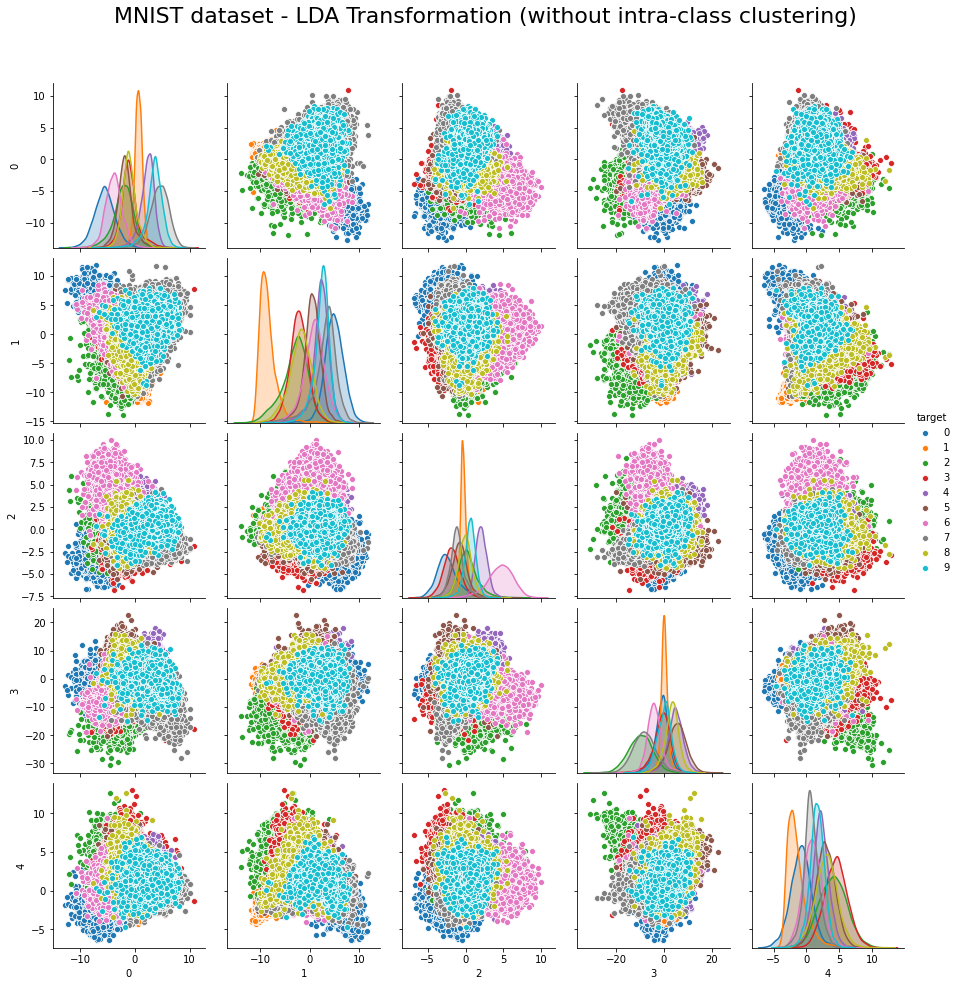

In [11]:
mnist_lda = pd.DataFrame.from_records(X_lda[:, :8])
mnist_lda['target'] = y
g = sns.pairplot(mnist_lda, hue="target")
g.fig.suptitle(f"MNIST dataset - LDA Transformation (without intra-class clustering)", y=1.08, fontsize=22);

In [12]:
X_lda_inv = lda.inverse_transform(X_lda, verbose=True)

X_lda_inv.shape

Reverse tranformation after dimensionality reduction may yield unexpected results: 5 dim. -> 784 dim.


(70000, 784)

## LDA Transformation (with intra-class clustering)
This is the pairplot of the first 8 dimensions of the MNIST dataset from Sci-Kit Learn after applying LDA.

In [13]:
ldacc = LinearDiscriminantAnalysis(random_state=42, n_components=n_dimensions)
X_ldacc = ldacc.fit_transform(X, y, min_clusters=1, max_clusters=2, class_clustering=True, verbose=True)

X_ldacc.shape

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters within class 0 for values between 1 and 2...

1 clusters: 	AIC: 60424075.200, 	BIC: 60429444.374  
2 clusters: 	AIC: 59692611.663, 	BIC: 59703356.849  
Optimal number of clusters for class 0 found: 2

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters within class 1 for values between 1 and 2...

1 clusters: 	AIC: 64026275.682, 	BIC: 64031748.468  
2 clusters: 	AIC: 61938373.361, 	BIC: 61949325.905  
Optimal number of clusters for class 1 found: 2

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters within class 2 for values between 1 and 2...

1 clusters: 	AIC: 61276623.774, 	BIC: 61282002.779  
2 clusters: 	AIC: 60790112.776, 	BIC: 60800877.638  
Optimal number of clusters for class 2 found: 2

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters w

Mu_c[1]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.0015   0.0015   0.0226   0.0405   0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.0286   0.1152   0.0986   0.0447   0.1456   0.265    0.8767   1.9494
   3.1394   4.4077   4.5572   4.1248   3.4515   2.439    1.536    0.7445
   0.1793   0.0164   0.       0.       0.       0.       0.       0.
   0.       0.   

Mu_c[8]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.0387   0.0662   0.0228   0.0156
   0.1544   0.1573   0.0148   0.0524   0.0327   0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.0394   0.1806
   0.109    0.1568   0.4467   0.6294   0.797    0.8196   1.0244   1.1583
   1.496    1.6289   1.0179   0.55     0.1466   0.027    0.       0.
   0.       0

Mu_c[16]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.0223   0.0557   0.1415   0.2539
   0.4017   0.711    0.8894   1.1915   1.1361   0.7147   0.3805   0.2018
   0.1452   0.1295   0.0901   0.0412   0.0037   0.       0.       0.
   0.       0.  

S_intra:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

S_inter:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Singular values:
Singular value 1: 	16.21%   	4.11028  	 Accepted
Singular value 2: 	14.67%   	3.71817  	 Accepted
Singular value 3: 	11.76%   	2.98166  	 Accepted
Singular value 4: 	8.20%    	2.07831  	 Accepted
Singular value 5: 	7.85%    	1.98999  	 Accepted
Singular value 6: 	7.49%    	1.90006  	 Accepted
Singular value 7: 	6.13%    	1.55332  	 Accepted
Singular value 8: 	5.33%    	1.3512   	 Accepted
Singular value 9: 	4.36%    	1.10493  	 Accepted
Singular value 10: 	3.35%    	0.848325 	 Accepted
Singular value 11: 	2.82%    	0.713941 	 Accepted
Singular value 12: 	2.50%    	0.634798 	 Accepted
Singular value 13: 	1.90%    	0.480454 	 Accepted
Singular v

W:
[[ 0.      0.      0.     ...  0.0269 -0.0107  0.0234]
 [ 0.      0.      0.     ...  0.0915  0.0133 -0.0502]
 [ 0.      0.      0.     ...  0.0039  0.0627 -0.0297]
 ...
 [ 0.      0.      0.     ...  0.0295 -0.0307 -0.0143]
 [ 0.      0.      0.     ... -0.0107  0.0112  0.0008]
 [ 0.      0.      0.     ... -0.0066  0.0046  0.0198]]



(70000, 5)

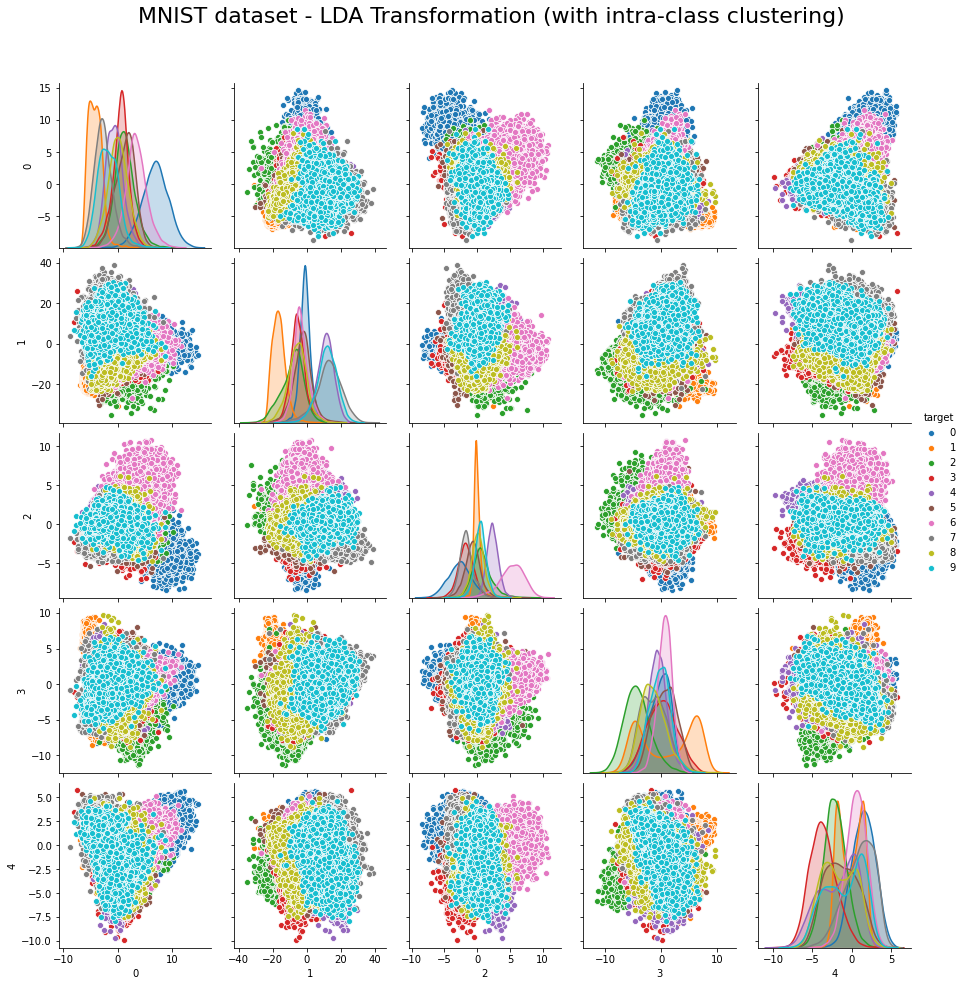

In [14]:
mnist_ldacc = pd.DataFrame.from_records(X_ldacc[:, :8])
mnist_ldacc['target'] = y
g = sns.pairplot(mnist_ldacc, hue="target")
g.fig.suptitle(f"MNIST dataset - LDA Transformation (with intra-class clustering)", y=1.08, fontsize=22);

In [15]:
X_ldacc_inv = ldacc.inverse_transform(X_ldacc, verbose=True)

X_ldacc_inv.shape

Reverse tranformation after dimensionality reduction may yield unexpected results: 5 dim. -> 784 dim.


(70000, 784)

## Unsupervised LDA Transformation
This is the pairplot of the first 8 dimensions of the MNIST dataset from Sci-Kit Learn after applying Unsupervised LDA.

In [16]:
ulda = LinearDiscriminantAnalysis(random_state=42, n_components=n_dimensions)
X_ulda = ulda.fit_transform(X, min_clusters=145, max_clusters=150, verbose=True)

X_ulda.shape

No target is provided: using unsupervised clustering.

Predicting the classes from the clusters...

Searching for an optimal number of clusters between 145 and 150...

145 clusters: 	AIC: 574412241.422, 	BIC: 575455770.137  
146 clusters: 	AIC: 574355470.473, 	BIC: 575406196.001  
147 clusters: 	AIC: 574332719.260, 	BIC: 575390641.601  
148 clusters: 	AIC: 574275314.491, 	BIC: 575340433.646  
149 clusters: 	AIC: 574379303.118, 	BIC: 575451619.085  
150 clusters: 	AIC: 574310021.930, 	BIC: 575389534.710  
Optimal number of clusters found: 148

Mu:
[[  0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.0018   0.0067   0.0031   0.0001
    0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.
    0.0002   0.0013   0.0113   0.0231   0.0432   0.0622   0.1179   0.1712
    0.1934   0.1901   0.2063   0.1827   0.1701   0.1445   0.0992   0.0682
    0.0489   0.

Mu_c[22]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0. 

Mu_c[46]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.0176   0.5475   2.0317   2.4331   0.8556   0.4102
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.      

Mu_c[69]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.1205
   0.5692   0.4777   0.0915   0.       0.       0.       0.       0.
   0.       0.      

Mu_c[89]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0. 

Mu_c[113]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.2977   0.3512   0.0721   0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.4488   0.7256   1.2837   2.6744   2.3209   2.0116   1.7326   1.6767
   0.5953   0.0047   0.       0.       0.       0.       0.       0.0628
   0.593    0.3837   0.       0.       0.       0.       0.       0.
   0.       0.       0.1047   1.4419   4.0814   7.3023   8.3535   8.2907
   7.2558   5.4744   3.886    2.8209   1.5047   0.1465   0.       0.
   0.       0.       0.       0.0628   0.5907   0.3814   0.       0.
   0.      

Mu_c[137]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.

S_intra:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

S_inter:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Singular values:
Singular value 1: 	10.66%   	7.86058  	 Accepted
Singular value 2: 	8.95%    	6.60097  	 Accepted
Singular value 3: 	6.41%    	4.7262   	 Accepted
Singular value 4: 	6.09%    	4.49025  	 Accepted
Singular value 5: 	4.94%    	3.64519  	 Accepted
Singular value 6: 	4.67%    	3.44029  	 Accepted
Singular value 7: 	4.03%    	2.9709   	 Accepted
Singular value 8: 	3.34%    	2.46448  	 Accepted
Singular value 9: 	3.00%    	2.21432  	 Accepted
Singular value 10: 	2.58%    	1.90344  	 Accepted
Singular value 11: 	2.18%    	1.60899  	 Accepted
Singular value 12: 	2.11%    	1.55354  	 Accepted
Singular value 13: 	2.03%    	1.499    	 Accepted
Singular v

W:
[[ 0.      0.      0.     ...  0.0269 -0.0107  0.0234]
 [ 0.      0.      0.     ...  0.0915  0.0133 -0.0502]
 [ 0.      0.      0.     ...  0.0039  0.0627 -0.0297]
 ...
 [ 0.      0.      0.     ...  0.0295 -0.0307 -0.0143]
 [ 0.      0.      0.     ... -0.0107  0.0112  0.0008]
 [ 0.      0.      0.     ... -0.0066  0.0046  0.0198]]



(70000, 5)

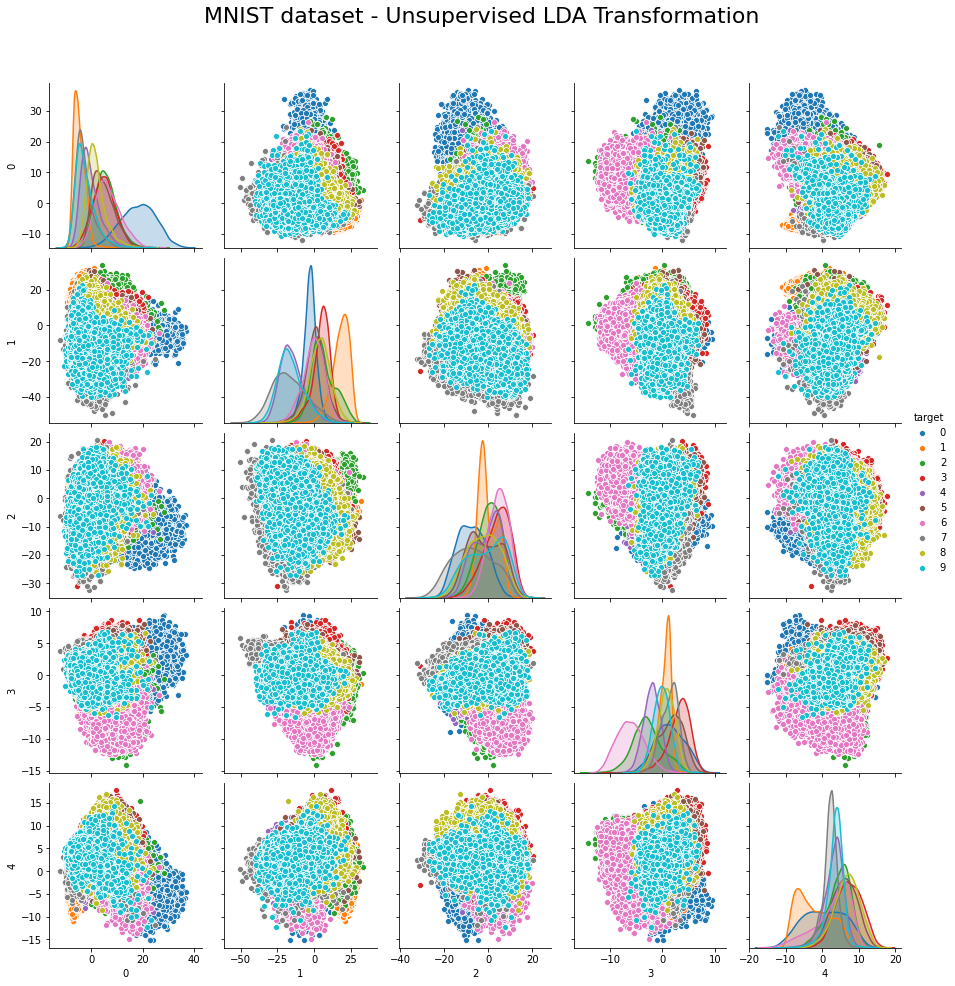

In [17]:
mnist_ulda = pd.DataFrame.from_records(X_ulda[:, :8])
mnist_ulda['target'] = y
g = sns.pairplot(mnist_ulda, hue="target")
g.fig.suptitle(f"MNIST dataset - Unsupervised LDA Transformation", y=1.08, fontsize=22);

In [18]:
X_ulda_inv = ulda.inverse_transform(X_ulda, verbose=True)

X_ulda_inv.shape

Reverse tranformation after dimensionality reduction may yield unexpected results: 5 dim. -> 784 dim.


(70000, 784)

## Comparison of the inverse transformation

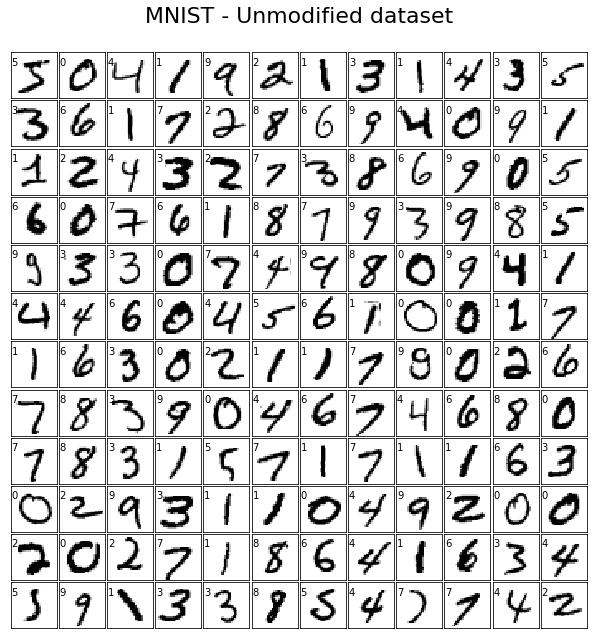

In [19]:
print_mnist(X, y, title="MNIST - Unmodified dataset")

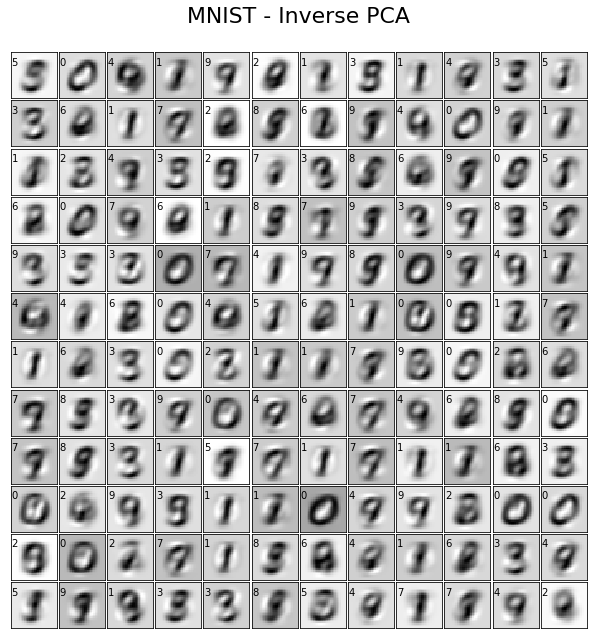

In [20]:
print_mnist(X_pca_inv, y, title="MNIST - Inverse PCA")

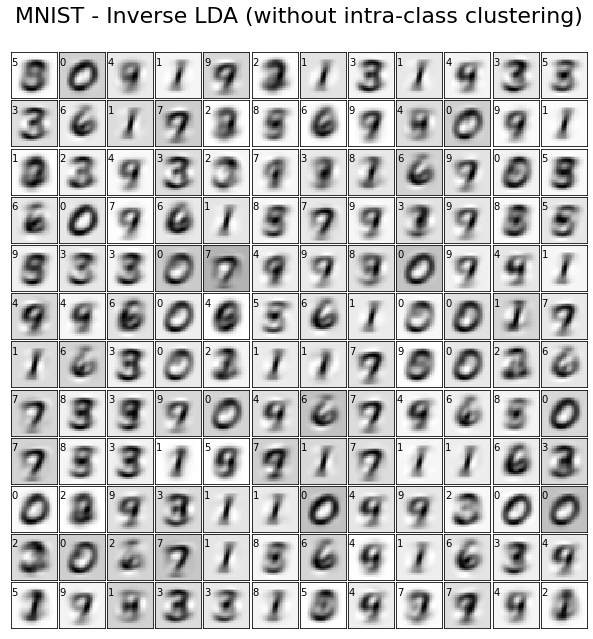

In [21]:
print_mnist(X_lda_inv, y, title="MNIST - Inverse LDA (without intra-class clustering)")

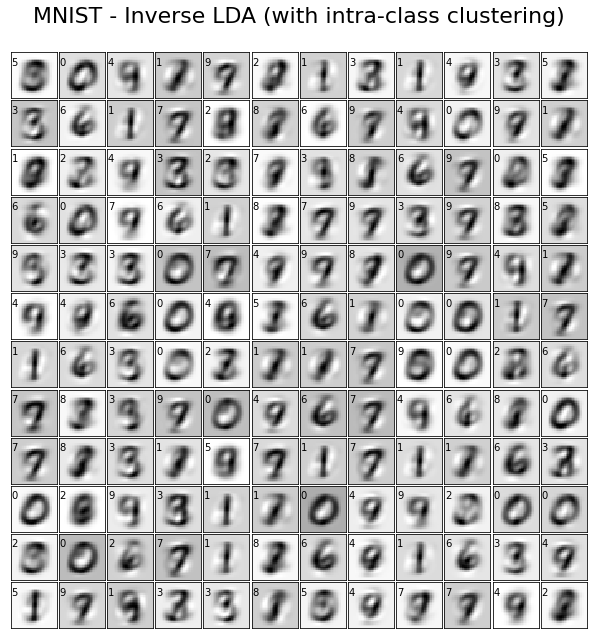

In [22]:
print_mnist(X_ldacc_inv, y, title="MNIST - Inverse LDA (with intra-class clustering)")

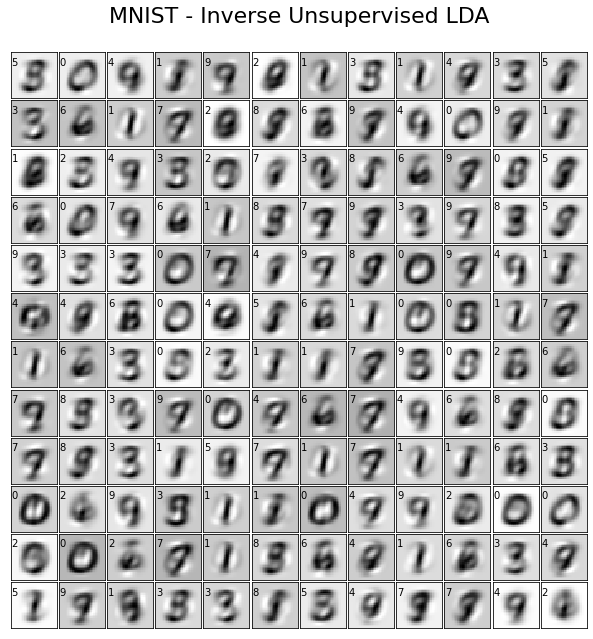

In [23]:
print_mnist(X_ulda_inv, y, title="MNIST - Inverse Unsupervised LDA")

## Comparison on different classifiers

In [24]:
gnb = GaussianNB()
res_original = np.mean(cross_val_score(gnb, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(gnb, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(gnb, X_lda, y, cv=5, scoring='accuracy'))
res_ldacc = np.mean(cross_val_score(gnb, X_ldacc, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(gnb, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with Naive Bayes:\n"
      f" - Original dataset                       : {res_original:.2%}\n"
      f" - PCA transformation                     : {res_pca:.2%}\n"
      f" - LDA transformation (w/o clustering)    : {res_lda:.2%}\n"
      f" - LDA transformation (w/ clustering)     : {res_ldacc:.2%}\n"
      f" - Unsupervised LDA transformation        : {res_ulda:.2%}\n")

Prediction score with Naive Bayes:
 - Original dataset                       : 55.66%
 - PCA transformation                     : 64.66%
 - LDA transformation (w/o clustering)    : 82.48%
 - LDA transformation (w/ clustering)     : 75.19%
 - Unsupervised LDA transformation        : 64.87%



In [25]:
dtc = DecisionTreeClassifier(max_depth=9, random_state=42)
res_original = np.mean(cross_val_score(dtc, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(dtc, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(dtc, X_lda, y, cv=5, scoring='accuracy'))
res_ldacc = np.mean(cross_val_score(dtc, X_ldacc, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(dtc, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Decision Tree Classifier:\n"
      f" - Original dataset                       : {res_original:.2%}\n"
      f" - PCA transformation                     : {res_pca:.2%}\n"
      f" - LDA transformation (w/o clustering)    : {res_lda:.2%}\n"
      f" - LDA transformation (w/ clustering)     : {res_ldacc:.2%}\n"
      f" - Unsupervised LDA transformation        : {res_ulda:.2%}\n")

Prediction score with a Decision Tree Classifier:
 - Original dataset                       : 83.74%
 - PCA transformation                     : 66.68%
 - LDA transformation (w/o clustering)    : 80.85%
 - LDA transformation (w/ clustering)     : 76.84%
 - Unsupervised LDA transformation        : 68.00%



In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='tanh', max_iter=250, alpha=0.01, solver='sgd', 
                    verbose=False, random_state=42, learning_rate_init=.01)
res_original = np.mean(cross_val_score(mlp, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(mlp, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(mlp, X_lda, y, cv=5, scoring='accuracy'))
res_ldacc = np.mean(cross_val_score(mlp, X_ldacc, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(mlp, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Multilayer Perceptron Classifier:\n"
      f" - Original dataset                       : {res_original:.2%}\n"
      f" - PCA transformation                     : {res_pca:.2%}\n"
      f" - LDA transformation (w/o clustering)    : {res_lda:.2%}\n"
      f" - LDA transformation (w/ clustering)     : {res_ldacc:.2%}\n"
      f" - Unsupervised LDA transformation        : {res_ulda:.2%}\n")

Prediction score with a Multilayer Perceptron Classifier:
 - Original dataset                       : 83.97%
 - PCA transformation                     : 72.25%
 - LDA transformation (w/o clustering)    : 85.03%
 - LDA transformation (w/ clustering)     : 82.61%
 - Unsupervised LDA transformation        : 76.63%



## Visualization of the centroids

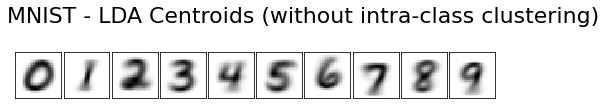

In [27]:
print_mnist(lda.mu_c_, title="MNIST - LDA Centroids (without intra-class clustering)")

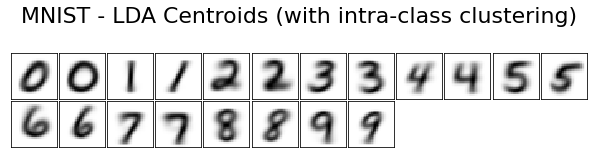

In [28]:
print_mnist(ldacc.mu_c_, title="MNIST - LDA Centroids (with intra-class clustering)")

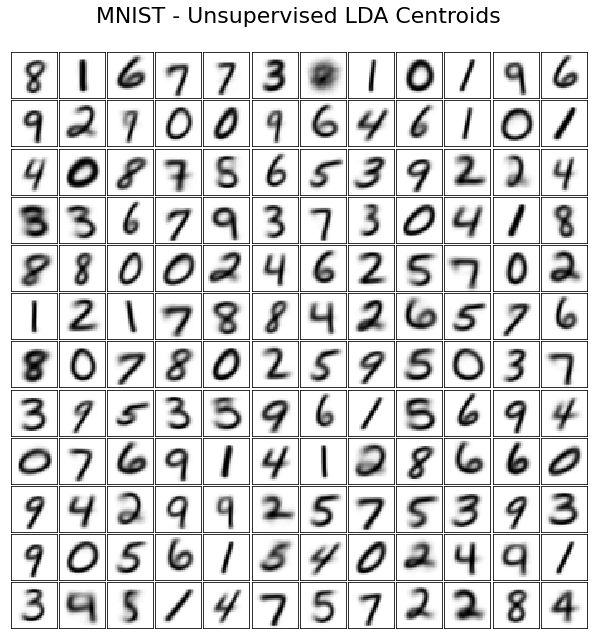

In [29]:
print_mnist(ulda.mu_c_, title="MNIST - Unsupervised LDA Centroids")